In [8]:

import matplotlib
from matplotlib import pyplot as plt
from ren import renAlgo
import scipy
import scipy.signal
import numpy as np
import os
from calibrate import focal2distance
import pickle
import cv2
from huHann import huHann

In [9]:
def neighbourReplace(src,size):
    Rf=scipy.ndimage.maximum_filter(src,size=size)
    src[np.where(src<=0.49)]= Rf[np.where(src<=0.49)]
    return src

def renAlgo(files,focal):
    confMaps=[]
    for index, filename in enumerate(files):
        print(filename)
        im = cv2.imread(filename)
        
        img=im[:,:,2].astype(int)
        blurmap=huHann(img)
        plt.figure()
        plt.imshow(blurmap,cmap="gray")
        nmap=(8-blurmap)/8
        plt.figure()
        plt.imshow(nmap,cmap="gray")
        blur = cv2.GaussianBlur(nmap,(99,99),0)
        blur = cv2.GaussianBlur(blur,(99,99),0) # second order
        plt.figure()
        plt.imshow(blur,cmap="gray")
        confMaps.append(blur)

    flatConf=np.array(confMaps)

    oneDepth=np.ones([len(flatConf[0,:,0]),len(flatConf[0,0,:])])*999
    for row in range(len(flatConf[0,:,0])):
        for col in range(len(flatConf[0,0,:])):
            corr=flatConf[:,row,col]
            maxInd=corr.argmax()
            #print(maxInd)
            oneDepth[row,col]=focal[maxInd]
    plt.figure()
    plt.imshow(oneDepth,cmap="gray")
    result=255*(neighbourReplace(oneDepth,100)-min(focal))/(max(focal)-min(focal))
    plt.figure()
    plt.imshow(result,cmap="gray")
    # and renormalize
    return result


[0.4, 0.55, 0.7, 0.72, 0.75, 0.77, 0.8, 0.85]
8
8
testset2/IMG_8494.JPG
testset2/IMG_8495.JPG
testset2/IMG_8496.JPG
testset2/IMG_8497.JPG
testset2/IMG_8498.JPG
testset2/IMG_8499.JPG
testset2/IMG_8500.JPG


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


testset2/IMG_8501.JPG


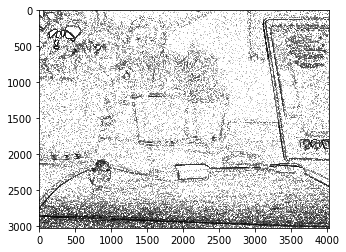

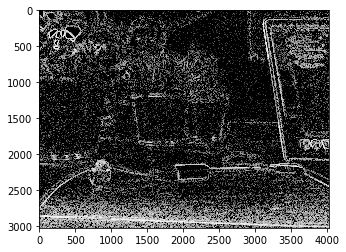

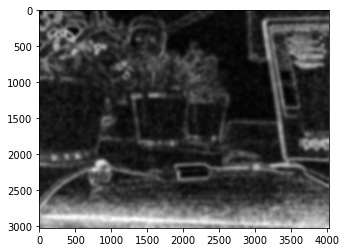

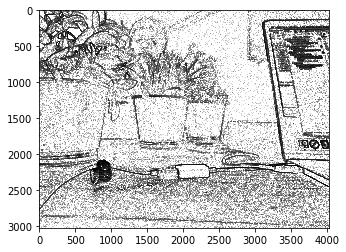

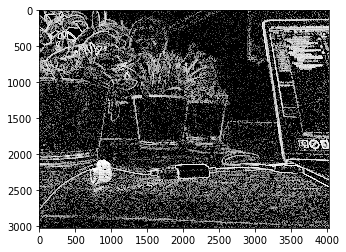

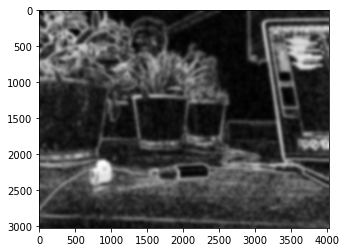

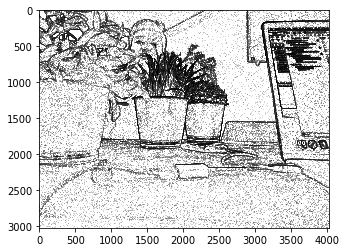

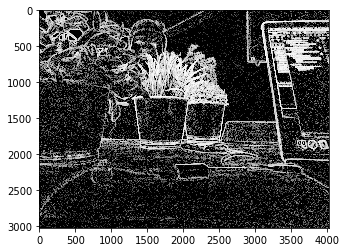

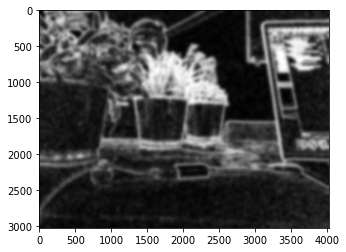

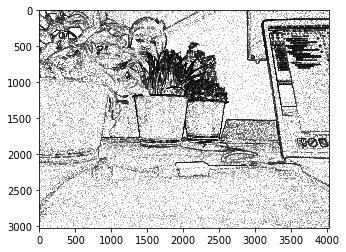

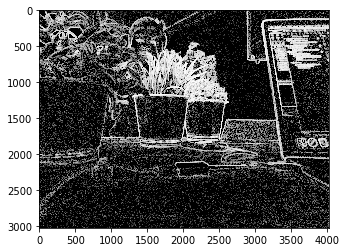

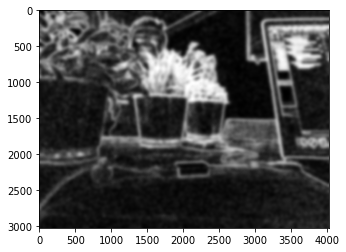

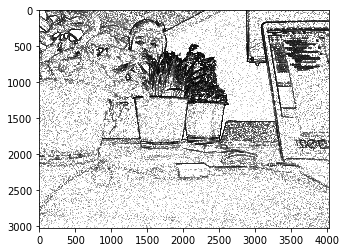

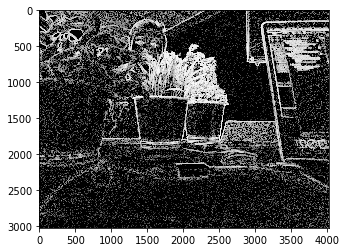

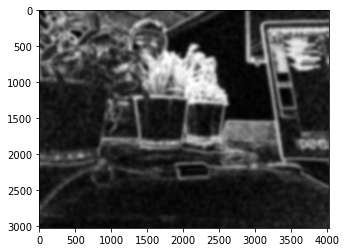

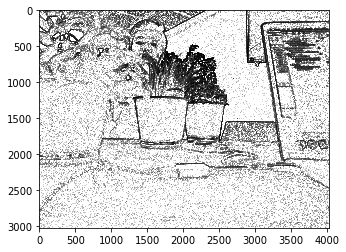

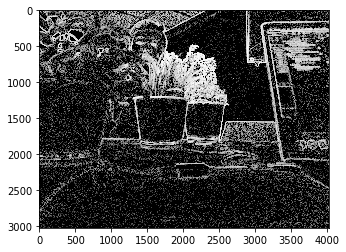

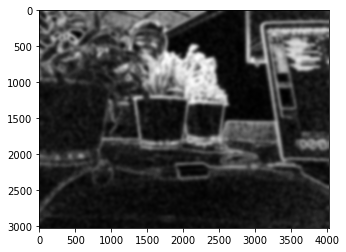

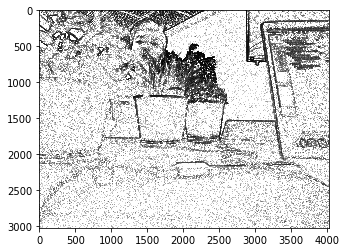

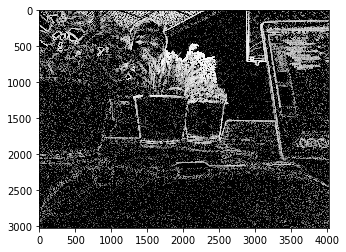

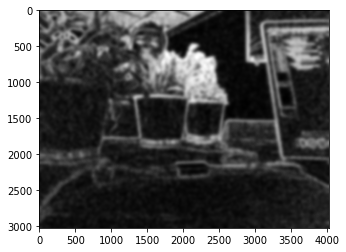

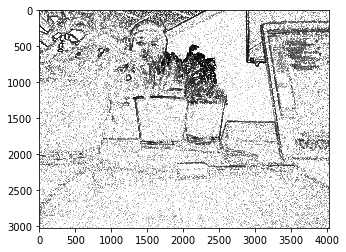

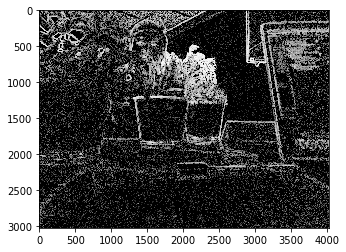

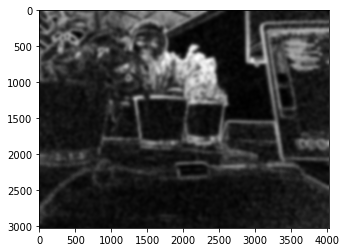

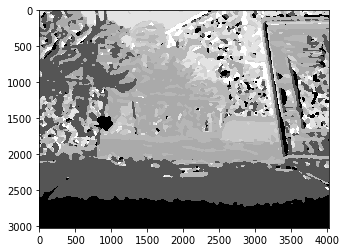

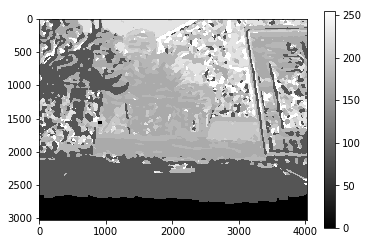

In [10]:
focal=[0.4, 0.55, 0.7, 0.72, 0.75, 0.77, 0.8, 0.85]
#focal=[focal2distance(x) for x in focal]
print(focal)
filesDir=[]
for file in os.listdir("testset2"):
    
    filesDir.append("testset2/"+file)

print(len(focal))
print(len(filesDir))

smoothDepth=renAlgo(filesDir,focal)


plt.imshow(smoothDepth,cmap='gray')
plt.colorbar()

plt.imsave("newmap2.png",smoothDepth,cmap='gray')
